<a href="https://colab.research.google.com/github/Joel-Wang-Math/MMiDS_extensions/blob/main/Matrix%2C_Calculus_and_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
u = np.array([1., 3., 5., 7.])#each number is a float (a decimal number), not an integer.
print(u)

[1. 3. 5. 7.]


In [5]:
print(u[0])
print(u[2])

1.0
5.0


In [6]:
from numpy import linalg as la # sub-package
print(la.norm(u))

9.16515138991168


In [7]:
np.sqrt(np.sum(u**2)) # in Numpy, ** indicates element-wise exponentiation.

np.float64(9.16515138991168)

In [8]:
u = np.array([1., 3., 5., 7.])
v = np.array([2., 4., 6., 8.])
w = np.array([1., 1., 1., 1.])
X = np.stack((u,v,w),axis=0)#axis=0 is stacked as row; axis=0 is stacked as column
print(X)

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]
 [1. 1. 1. 1.]]


In [9]:
Y = np.array([[1., 3., 5., 7.],[2., 4., 6., 8.]])# the default way to do it is axis=0, stacked as row;
print(Y)
la.norm(Y,axis=1),la.norm(Y,axis=0),la.norm(Y) # calculate the norm of matrix

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]]


(array([ 9.16515139, 10.95445115]),
 array([ 2.23606798,  5.        ,  7.81024968, 10.63014581]),
 np.float64(14.2828568570857))

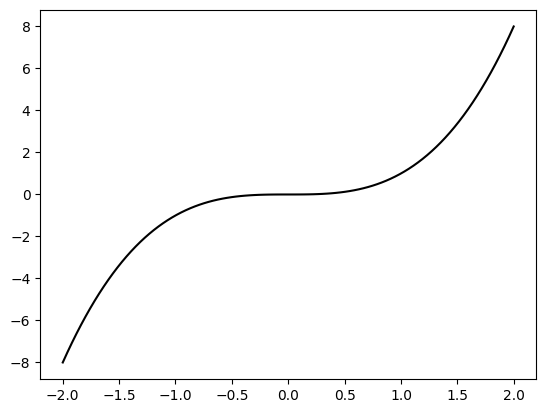

In [10]:
import matplotlib.pyplot as plt
x = np.linspace(-2,2,100)
y = x**3
plt.plot(x,y,c="k")
#plt.ylim(-4.25,4.25)
plt.show()

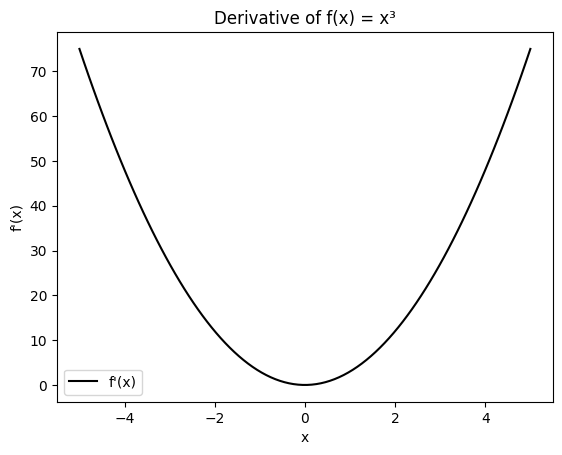

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 1. Symbolic math
x = sp.symbols('x')
f = x**3
f_prime = sp.diff(f, x)  # Derivative: 3*x**2

# 2. Convert symbolic function to numeric function
f_prime_func = sp.lambdify(x, f_prime, 'numpy') #lambdify convet a SymPy expression into a NumPy function

# 3. Generate x values and evaluate derivative
x_vals = np.linspace(-5, 5, 100)
y_vals = f_prime_func(x_vals)

# 4. Plot
plt.plot(x_vals, y_vals, c="k", label="f'(x)")
plt.title("Derivative of f(x) = x³")
plt.xlabel("x")
plt.ylabel("f'(x)")
#plt.grid(True)
plt.legend()
plt.show()


In [12]:
# In order to obtain a sample from uniform distribution, we must first instantiate a random number generator (RNG)
seed = 535
rng = np.random.default_rng(seed)
rng.uniform() #Generate a random number from a uniform distribution over the interval [0.0,1.0)

0.9836159914889122

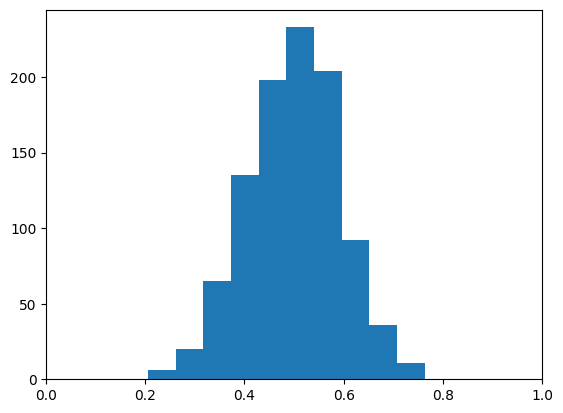

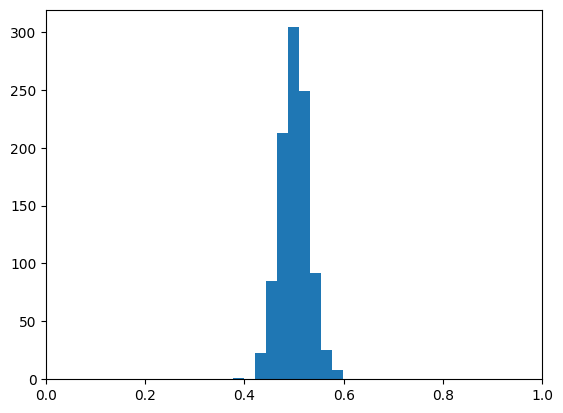

In [13]:
n,k =10,1000
#print([np.mean(rng.uniform(size=n))for i in range(k)])
sample_mean = [np.mean(rng.uniform(size=n))for i in range(k)] # It's Python syntax for creating a list in one line. The general form is:[<expression> for <item> in <iterable>]
plt.hist(sample_mean,bins=10)
plt.xlim(0,1)
plt.show()

sample_mean = [np.mean(rng.uniform(size=n*10))for i in range(k)]
plt.hist(sample_mean,bins=10)
plt.xlim(0,1)
plt.show()

# Taking k much larger leads to more concentration around the mean
# You can have a try that change k won't affect anything, but change n does
# that's weak law of large numbers

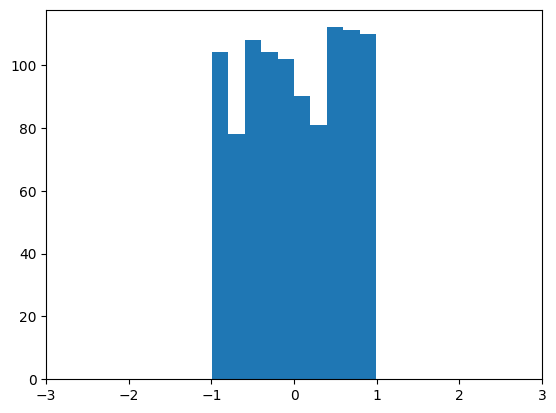

In [14]:
a = -1
b = 1
X = rng.uniform()
# EDIT THIS LINE: transform X to obtain a random variable Y ~ U[a,b]
rng = np.random.default_rng(seed)
rng.uniform()
sample = a + (b - a)*rng.uniform(size=1000)
plt.hist(sample,bins=10)
plt.xlim(a - 2,b + 2)
plt.show()

# !!! this is famous inverse transform sampling method

In [15]:
# a function to sample a spherical gaussian distribution
def spherical_gaussian(rng, d, n, mu, sig):
    return mu + sig * rng.normal(0,1,(n,d))

**!!!  Where we use the spherical gauussian in this text book?**

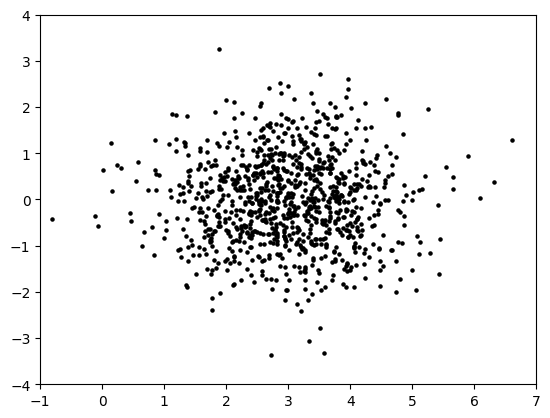

In [60]:
d, n, w, sig = 3, 1000, 3., 1.
mu = np.hstack(([w], np.zeros(d-1))) # np.hstack expect vector like [], not scalar
X = spherical_gaussian(rng, d, n, mu, sig)
#print(X)
plt.scatter(X[:,0], X[:,1], s=5, c='k') # plt.scatter() (from Matplotlib) is for 2D plots only
plt.axis([-1, 7, -4, 4])
plt.show()

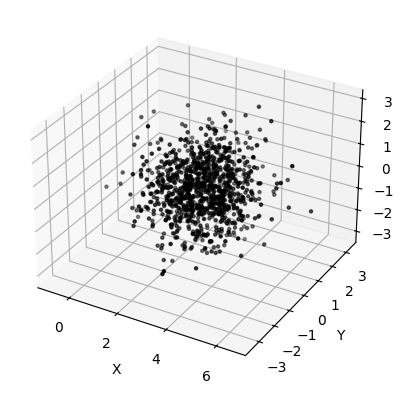

In [64]:
from mpl_toolkits.mplot3d import Axes3D # This is from ChatGPT, a 3D spherical gauussian
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')#It's a common Matplotlib shorthand: "Give me a full figure with just one subplot that takes up the whole space."
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=5, c='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


**This does look like a sphere.**

In [48]:
# Then it is a mixtures of spherical Gaussians, a special case of the Gaussian Mixture Model (GMM)
# Why we need to consider this?

def gmm2spherical(rng, d, n, phi0, phi1, mu0, sig0, mu1, sig1):

    phi, mu, sig = np.stack((phi0, phi1)), np.stack((mu0, mu1)), np.stack((sig0,sig1)) # we put these data in matrix then we can use mu[component[i],:], sig[component[i] to choose them, good!

    X = np.zeros((n,d))
    component = rng.choice(2, size=n, p=phi)
    for i in range(n):
        X[i,:] = spherical_gaussian(rng, d, 1, mu[component[i],:], sig[component[i]])

    return X
  # What's going on in the function?
component_sample = rng.choice(2, size=5, p=[0.7,0.3]) # we generate some specific random number 0,1
print(component_sample)

component_sample = rng.choice(3, size=5, p=[0.1,0.1,0.8]) # we generate some specific random number 0,1,2
print(component_sample)

[0 0 1 1 0]
[2 2 2 2 2]


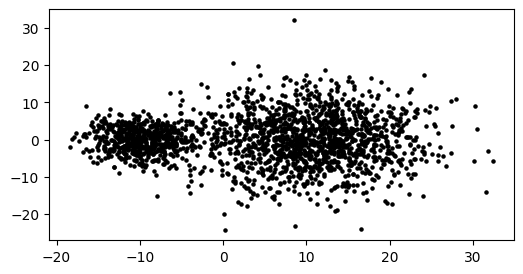

In [81]:
# different number of spots and different degrees of dispersion
d, n, w, sig0, sig1, phi0, phi1 = 2, 2000, 10, 3, 7, 0.3, 0.7

# these two ball looks similar since   sig0:sig1 = phi0:phi1

mu0, mu1 = np.hstack(([-w], np.zeros(d-1))), np.hstack(([w], np.zeros(d-1)))

X = gmm2spherical(rng, d, n, phi0, phi1, mu0, sig0, mu1, sig1)
plt.figure(figsize=(6,3))
#print(X)
plt.scatter(X[:,0], X[:,1], s=5, color='k')
#plt.axis([-8, 8, -4, 4])
plt.show()